
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset has information from several medical appointments in Brazil that tells us wheather the patient showed up or not.
This dataset has inforamtion about the patient such as (gender-age-ScheduledDay) and some information about their health such as (hypertension-diabetes-alcoholism-handicap) and other more information.

- from this dataset we could try to solve many diffrent questions.

##### for the analysis of this dataset I have choosen to look at the following questions (some sub questions are looked in detail in the analysis) :
- What is the parients showing-up and not showing-up percentage ?
- what factors affect showing-up rate and how do they affect it ?

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#loading the data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.info()
#as we can see there is no null values
#we need to convert 'ScheduledDay' 'AppointmentDay' to datetime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()
#we can see that min age is -1 which requires cleaning

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#checking if there is duplicates rows
df.duplicated().sum()
#there is no duplicated rows

0

In [7]:
#checking for wrong Age values that needs to be cleaned
len(df[df['Age']<=0])

3540


### Data Cleaning

### dropping 'PatientId','AppointmentID' coulumns as they have no useful informations

In [8]:
df.drop(columns=['PatientId','AppointmentID'],inplace=True)


In [9]:
#fixing columns names
df.columns = [ 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'no_show']

### Converting 'AppointmentDay' and 'ScheduledDay' from string to datetime

In [10]:

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### creating a new column to calculate the time patient had to wait before his appointment

In [11]:
df['waiting_time']=(df['AppointmentDay']-df['ScheduledDay'])
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show,waiting_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [12]:
#dropping 'ScheduledDay' and 'AppointmentDay' since we don't need them anymore
df.drop(columns=['ScheduledDay','AppointmentDay'],inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show,waiting_time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


### dropping ages <=0 (wrong data)

In [13]:
df.drop(df.index[df['Age']<=0],inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (how many people showed up for thier appointment ?)

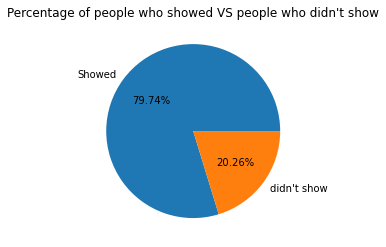

In [14]:

label=["Showed","didn't show"]
plt.pie(df['no_show'].value_counts(),labels=label,autopct='%1.2f%%')
plt.title("Percentage of people who showed VS people who didn't show")
plt.show()

### we can see that the showing up percentage is 79.74%

### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [15]:
### function to plot the relation between showing up and a specific variable
def bar_plot (df,variable):
    temp=(pd.crosstab(variable, df['no_show'],normalize='index')*100).round(2) # here we normalized the data so we can equally compare between them
    plot=temp.plot.bar(figsize=(15,4))
    plot.set_title('relation between '+temp.index.name+' and showing up' +'\n')
    plot.set_ylabel('showing-up percentage')
    plot.set_xlabel(temp.index.name)
    
    for p in plot.patches:
        width=p.get_width()
        height=p.get_height()
        x,y=p.get_xy() 
        plot.annotate(f'{height}',(x + width/2, y + height),ha='center')
    

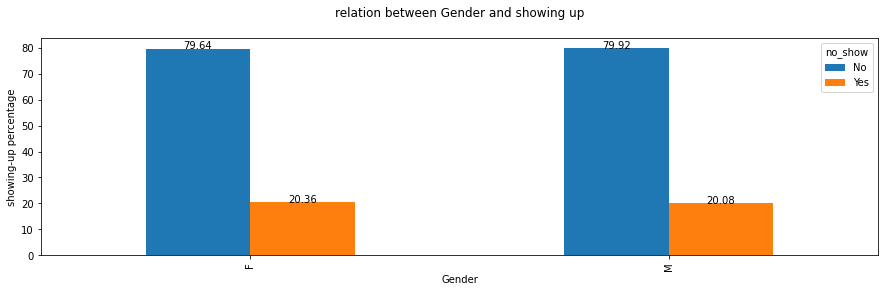

In [16]:
bar_plot(df,df.Gender)

### males precentage of showing up is slightly higher than females 

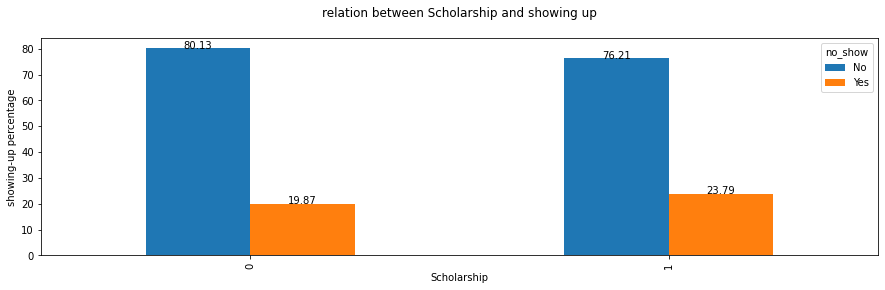

In [17]:
bar_plot(df,df.Scholarship)

### we can see that people who didn't have a scholarship has higher percentage of showing up

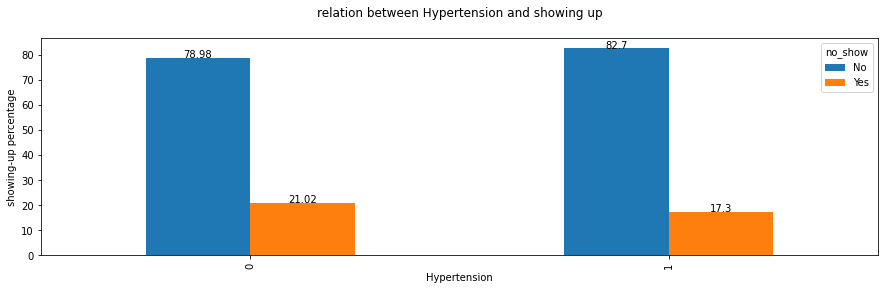

In [18]:
bar_plot(df,df.Hypertension)

### it's clear that that people who had hypertension has higher percentage of showing up

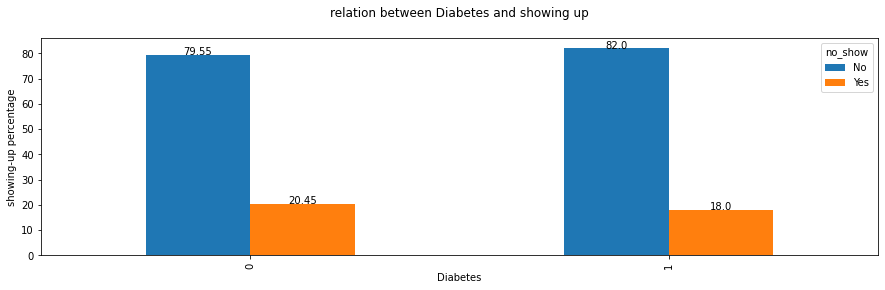

In [19]:
bar_plot(df,df.Diabetes)

### people with diabetes showed up more than people with no diabetes

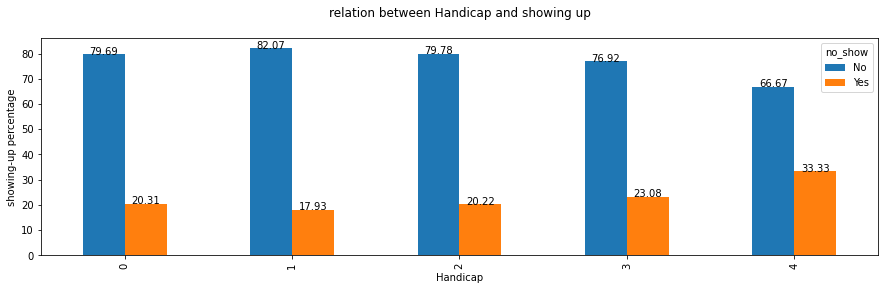

In [20]:
bar_plot(df,df.Handicap)

### people with handicap level 1 has the highest percentage of showing up, on the other hand people with handicap level 4 has the lowest percentage of showing up

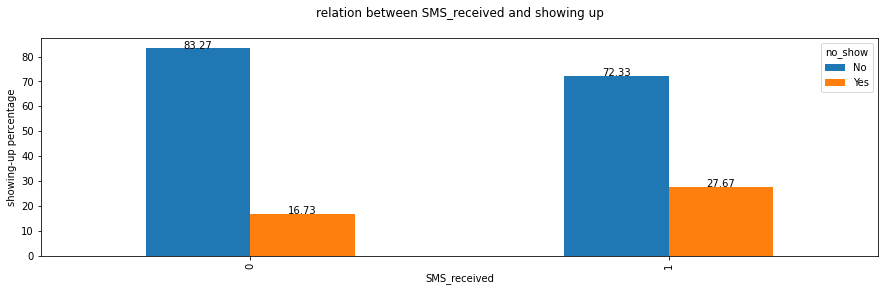

In [21]:
bar_plot(df,df.SMS_received)

### people who didn't receive SMS showed up with higher percentage

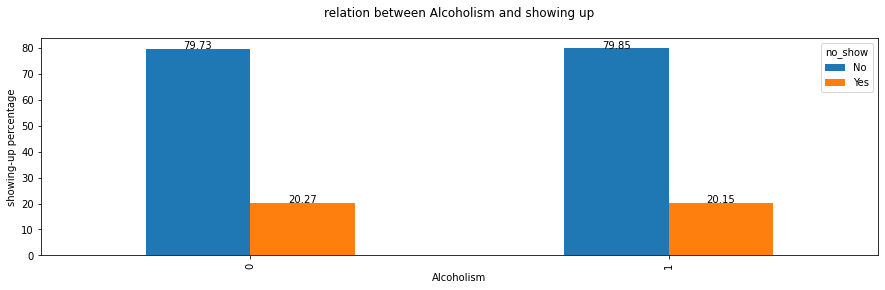

In [22]:
bar_plot(df,df.Alcoholism)

### people with Alcoholism has a slightly higher percentage of showing up

In [23]:
df["waiting_time"].max()

Timedelta('179 days 00:00:00')

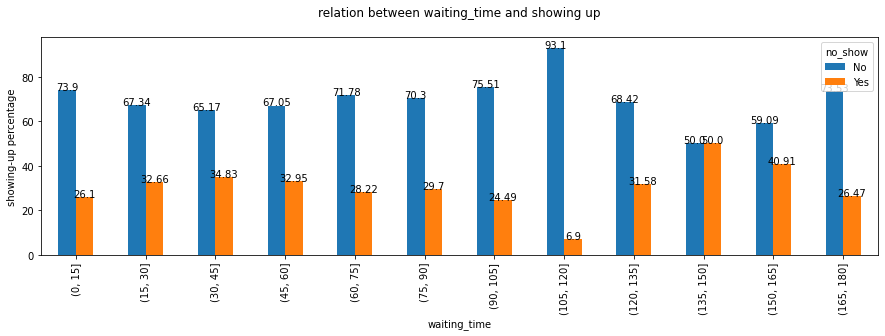

In [24]:

days=df["waiting_time"].dt.days
time_bins = pd.cut(days,bins=[0,15,30,45,60,75,90,105,120,135,150,165,180])
bar_plot(df,time_bins)


### from the plot we can observe tha patients who waited 105-120 days has the highest percentage of showing up ,while patients who waited 135-150 days has the lowest percentage of showing up

In [25]:
df["Age"].max()

115

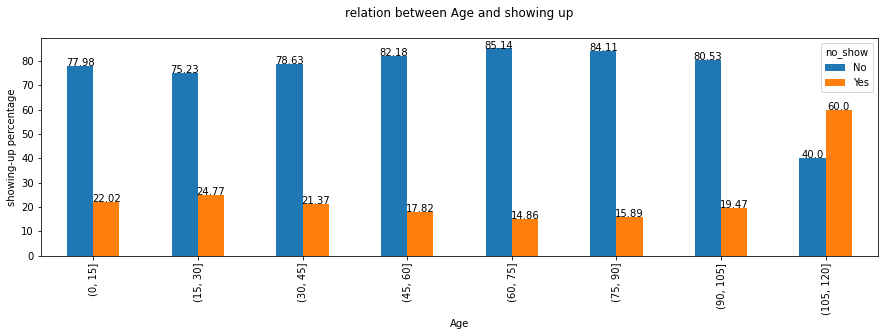

In [26]:
age_bins = pd.cut(df["Age"],bins=[0,15,30,45,60,75,90,105,120])
bar_plot(df,age_bins)


### people with age 60-75 has the highest percantage of showing up while people with age 105-120 has the lowest percantage of showing up

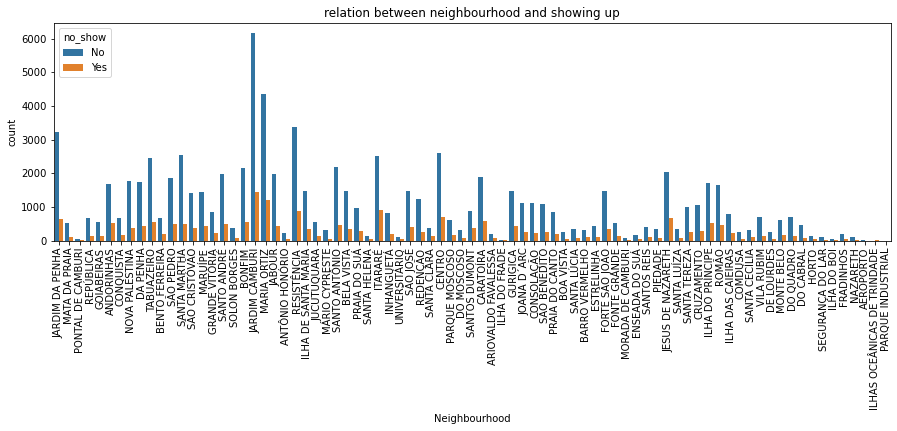

In [27]:
plt.figure(figsize=(15,4))
plt.title('relation between neighbourhood and showing up')
sns.countplot(x=df['Neighbourhood'],hue=df['no_show'])
plt.xticks(rotation='90')
plt.show()

### 

<a id='conclusions'></a>
# Conclusions
## results :
### after analysing the data we found out that there are several factors that had higher showing up rate such as :
- Gender = female 
- Not having a scholarship
- Having hypertension
- Having Diabetes
- Not getting SMS
- Being handicaped level 1
- Being Alcoholic
- Waiting from 105 to 120 days before Appointment day
9- Being 60-75 years old 

## Limitations :

- The analysis looked at the relation between showing-up rate and some other factor. It didn't look at how each factor affected the other.
- We had to drop data (3540 row) in the cleaning process
- The statistics used here are descriptive statistics, not inferential.
